In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
df = pd.read_pickle("raman_measurements.pkl")

### Constants

In [3]:
water_density = 33.3679*1e18 #mm-3
solid_angle = np.pi/(2)**2
exposure = 100
depr = 3.5

In [4]:
np.arctan(1/(2*3.6))

0.13800602365751946

In [5]:
solid_angle

0.7853981633974483

In [6]:
def raman_peak(wl,pw=1800):
    lrs = np.array([3410-pw, 3410+pw])
    return np.round(1/(1/(wl-3) - lrs/1e7), 1)

def gaussian(x,a,x0,sigma,b):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))+b

def diff_cs(wl):
    fex = 1e7/wl # cm-1
    fres = 8.8e4
    A = 5.33e-27 # cm-2/mol/sr
    fs = fex-3410 #np.linspace(wl, wl+500)
    return A*fs**4/(fres**2-fex**2)**2

def pwr_to_photons(wl, pwr):
    # wl: nm, pwr: W
    h = 6.626*1e-34
    c = 299792458*1e9 #nm/s
    epp = h*c/wl
    return pwr/epp

pwr_df = pd.read_pickle("beam_sampler_measurements.pkl")

sample_pwr = {}
for pol in [0,90]:
    selection = pwr_df[(pwr_df["pol"]==pol)&(pwr_df["location"]=="sample")]
    interp = interp1d(selection["mono_wavelength"], selection["power_median"], kind='nearest')
    sample_pwr[pol] = interp 
    

In [7]:

for pol in [0,90]:
    selection = df[(df["pol1"]==pol)&(df["ex_wl"]>300)]
    df.loc[selection.index, "real_power"] = sample_pwr[pol](selection["ex_wl"])

In [8]:
df[["ex_wl","power_median", "real_power"]].plot(x="ex_wl",)

# Raman diffrential cross section

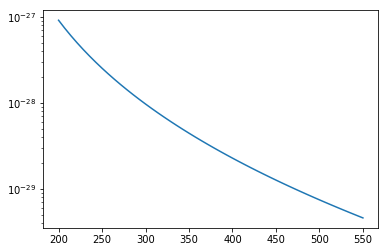

In [11]:
xs = np.linspace(200,550)
plt.plot(xs, diff_cs(xs))
plt.yscale('log')

In [17]:
diff_cs(450)/diff_cs(350)

1.269962479570306e-29

In [12]:
df

date  pol1  pol2  ex_wl   index       em_wl  counts  power_mean  \
0       251218   0.0   0.0  260.0     0.0   141.47516  1757.0    0.000003   
1       251218   0.0   0.0  260.0     1.0   142.00056  1807.0    0.000003   
2       251218   0.0   0.0  260.0     2.0   142.52596  1821.0    0.000003   
3       251218   0.0   0.0  260.0     3.0   143.05136  1794.0    0.000003   
4       251218   0.0   0.0  260.0     4.0   143.57675  1848.0    0.000003   
5       251218   0.0   0.0  260.0     5.0   144.10214  1784.0    0.000003   
6       251218   0.0   0.0  260.0     6.0   144.62753  1804.0    0.000003   
7       251218   0.0   0.0  260.0     7.0   145.15294  1792.0    0.000003   
8       251218   0.0   0.0  260.0     8.0   145.67833  1832.0    0.000003   
9       251218   0.0   0.0  260.0     9.0   146.20372  1808.0    0.000003   
10      251218   0.0   0.0  260.0    10.0   146.72911  1795.0    0.000003   
11      251218   0.0   0.0  260.0    11.0   147.25449  1832.0    0.000003   
12      251218   0.0   0.0  260.0    12.0   147.77988  1820.0    0.000003   
13      251218   0.0   0.0  260.0    13.0   148.30527  1840.0    0.000003   
14      251218   0.0   0.0  260.0    14.0   148.83064  1826.0    0.000003   
15      251218   0.0   0.0  260.0    15.0   149.35603  1861.0    0.000003   
16      251218   0.0   0.0  260.0    16.0   149.88141  1878.0    0.000003   
17      251218   0.0   0.0  260.0    17.0   150.40678  1855.0    0.000003   
18      251218   0.0   0.0  260.0    18.0   150.93217  1823.0    0.000003   
19      251218   0.0   0.0  260.0    19.0   151.45755  1858.0    0.000003   
20      251218   0.0   0.0  260.0    20.0   151.98293  1820.0    0.000003   
21      251218   0.0   0.0  260.0    21.0   152.50830  1869.0    0.000003   
22      251218   0.0   0.0  260.0    22.0   153.03368  1871.0    0.000003   
23      251218   0.0   0.0  260.0    23.0   153.55904  1835.0    0.000003   
24      251218   0.0   0.0  260.0    24.0   154.08441  1840.0    0.000003   
25      251218   0.0   0.0  260.0    25.0   154.60979  1823.0    0.000003   
26      251218   0.0   0.0  260.0    26.0   155.13515  1862.0    0.000003   
27      251218   0.0   0.0  260.0    27.0   155.66052  1848.0    0.000003   
28      251218   0.0   0.0  260.0    28.0   156.18588  1813.0    0.000003   
29      251218   0.0   0.0  260.0    29.0   156.71124  1843.0    0.000003   
...        ...   ...   ...    ...     ...         ...     ...         ...   
211170  251218  90.0  90.0  590.0  1570.0  1086.61960  1365.0    0.000002   
211171  251218  90.0  90.0  590.0  1571.0  1087.12790  1345.0    0.000002   
211172  251218  90.0  90.0  590.0  1572.0  1087.63640  1345.0    0.000002   
211173  251218  90.0  90.0  590.0  1573.0  1088.14470  1343.0    0.000002   
211174  251218  90.0  90.0  590.0  1574.0  1088.65310  1348.0    0.000002   
211175  251218  90.0  90.0  590.0  1575.0  1089.16140  1357.0    0.000002   
211176  251218  90.0  90.0  590.0  1576.0  1089.66970  1351.0    0.000002   
211177  251218  90.0  90.0  590.0  1577.0  1090.17790  1346.0    0.000002   
211178  251218  90.0  90.0  590.0  1578.0  1090.68620  1358.0    0.000002   
211179  251218  90.0  90.0  590.0  1579.0  1091.19450  1352.0    0.000002   
211180  251218  90.0  90.0  590.0  1580.0  1091.70260  1355.0    0.000002   
211181  251218  90.0  90.0  590.0  1581.0  1092.21080  1369.0    0.000002   
211182  251218  90.0  90.0  590.0  1582.0  1092.71900  1341.0    0.000002   
211183  251218  90.0  90.0  590.0  1583.0  1093.22720  1361.0    0.000002   
211184  251218  90.0  90.0  590.0  1584.0  1093.73540  1362.0    0.000002   
211185  251218  90.0  90.0  590.0  1585.0  1094.24340  1359.0    0.000002   
211186  251218  90.0  90.0  590.0  1586.0  1094.75160  1354.0    0.000002   
211187  251218  90.0  90.0  590.0  1587.0  1095.25960  1363.0    0.000002   
211188  251218  90.0  90.0  590.0  1588.0  1095.76770  1350.0    0.000002   
211189  251218  90.0  90.0  590.0  1589.0  1096.27580  1350.0    0.000002   
211190

/home/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/joe/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


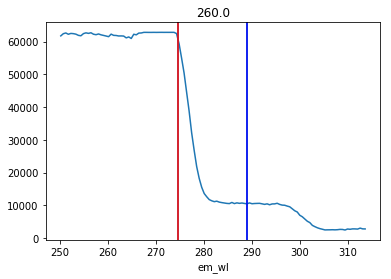

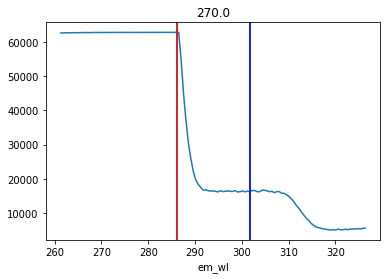

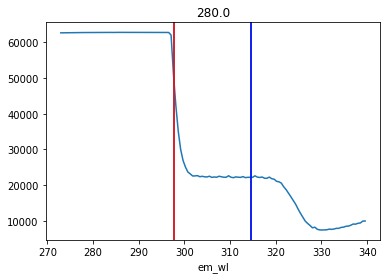

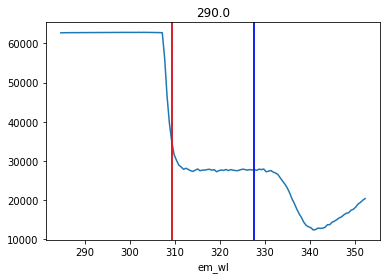

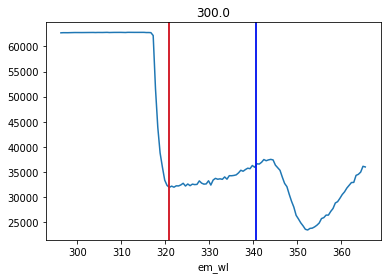

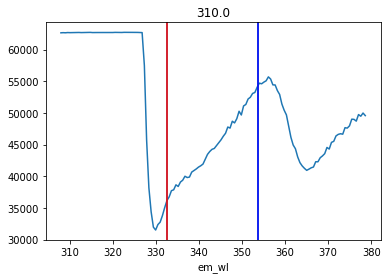

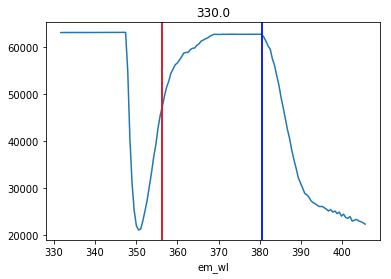

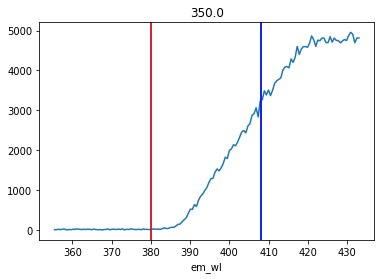

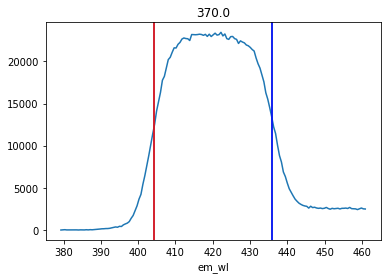

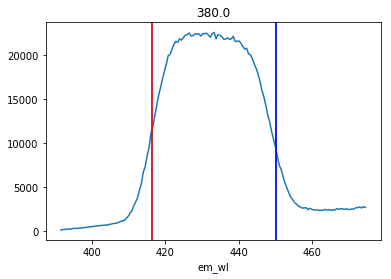

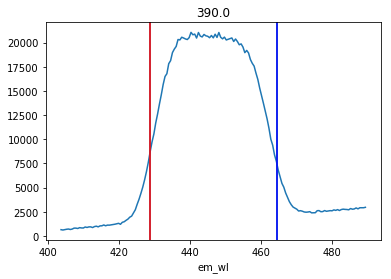

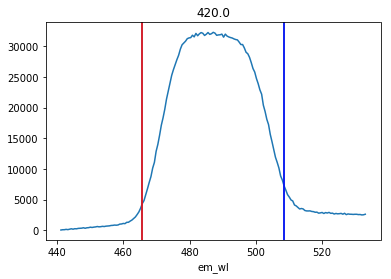

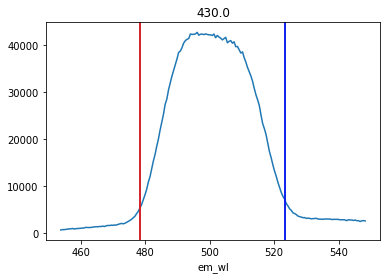

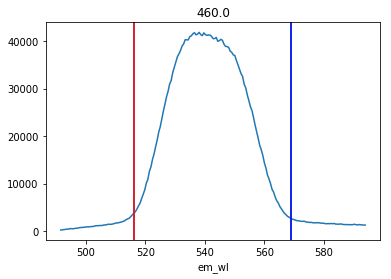

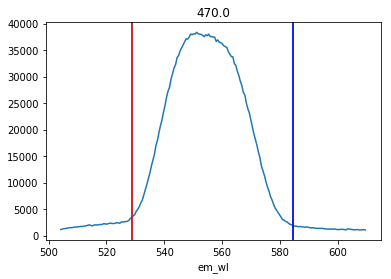

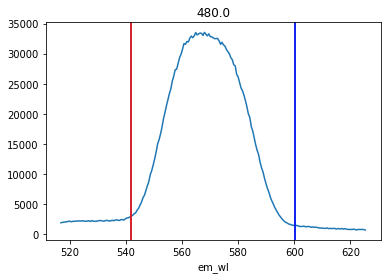

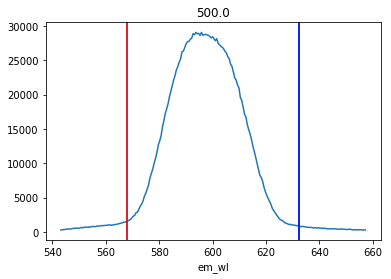

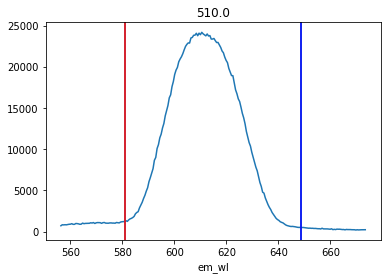

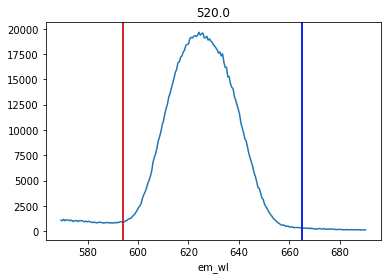

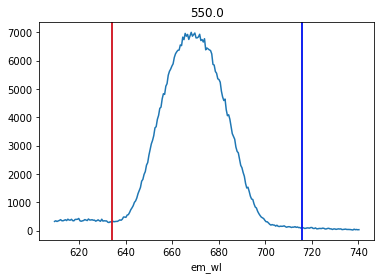

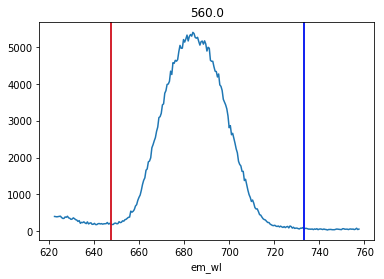

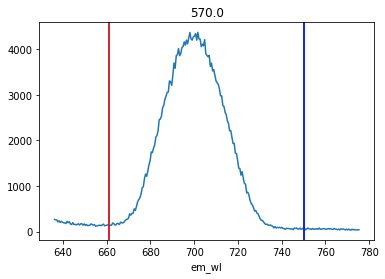

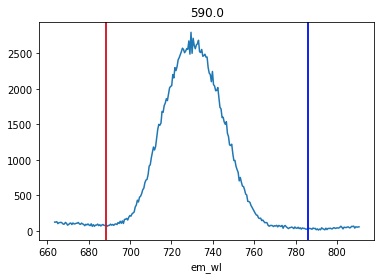

In [10]:
data = defaultdict(list)

# fig = plt.figure()
# ax = fig.subplots(1,1,sharex='all')
ps = []
ax = None
for (ex_wl,pol1,pol2), grp in df.groupby(["ex_wl", "pol1", "pol2"]):
    
    l,r = raman_peak(ex_wl, pw=900)
    grp = grp.copy()
    grp["normed"] = grp['counts'] - grp['counts'].min()
    sub = grp[(grp["em_wl"]<r)&(grp["em_wl"]>l)]
    vis = grp[(grp["em_wl"]<r+25)&(grp["em_wl"]>l-25)]
#     p, c = curve_fit(gaussian, vis["em_wl"], vis["normed"], p0=[sub["normed"].max(), sub["em_wl"].mean(), 50, sub["normed"].min()])
#     ps.append(p)
#     try:
#         p, c = curve_fit(gaussian, vis["em_wl"], vis["normed"], p0=[sub["normed"].max(), sub["em_wl"].mean(), 25, sub["normed"].min()])
#     except:
#         p = [0, 1, 1, 1]
#     ps.append(p)
    #sub.loc[sub["normed"]>sub["normed"].median()+2*sub["normed"].std(), "normed"] = sub["normed"].median()
    
#     peaks[(ex_wl,pol1,pol2)] = sub["normed"].sum()
#     ax = vis.plot(x="em_wl", y="normed", ax=ax, legend=False)
    vis["diff"] = vis["normed"].diff()
    for k,v in zip(('ex_wl','pol1','pol2'),(ex_wl,pol1,pol2)):
        data[k].append(v)
    mn = l #vis.loc[vis["normed"].diff().idxmax(),"em_wl"]
    mx = r #vis.loc[vis["normed"].diff().idxmin(),"em_wl"]
    data["area"].append(vis.loc[(vis["em_wl"]>mn)&(vis["em_wl"]<mx), "normed"].sum())
    data["width"].append(len(vis.loc[(vis["em_wl"]>mn)&(vis["em_wl"]<mx), "normed"].index))
    if not (pol1==0 and pol2==0):
        continue
#     ax = vis[vis["diff"]>10].plot(x="em_wl", y="diff", ax=None, legend=False)
    ax = vis.plot(x="em_wl", y="normed", ax=None, legend=False)
    ax.axvline(x=mn)
    ax.axvline(x=mx)
    ax.axvline(x=l, color='r')
    ax.axvline(x=r, color='b')
    plt.title(f"{ex_wl}")
#     ax.plot(x=sub["em_wl"], y=gaussian(sub["em_wl"], *p), color="r")
#     ax.axvline(x=l, linestyle='--', color='r', linewidth=0.5)
#     ax.axvline(x=r, linestyle='--', color='r', linewidth=0.5)
# plt.ylim((0,500))
# plt.yscale('log')


In [11]:
df_peaks = pd.DataFrame(data=data)
df_peaks = df_peaks[(df_peaks["ex_wl"]>360)&(df_peaks["ex_wl"]<700)]
df_peaks["em_wl"] = [np.mean(raman_peak(wl)) for wl in df_peaks["ex_wl"]]

In [12]:
def expected_photons(row):
#     print(row)
    wl = row['ex_wl']
    pol = row['pol1']
    if row['pol2']==row['pol1']:
        depr = 1
    else:
        depr = 1/3.5
    return pwr_to_photons(wl, sample_pwr[pol](wl))*diff_cs(wl)*solid_angle*water_density*exposure*depr
df_peaks["expected_ph"] = df_peaks.apply(expected_photons, axis=1)

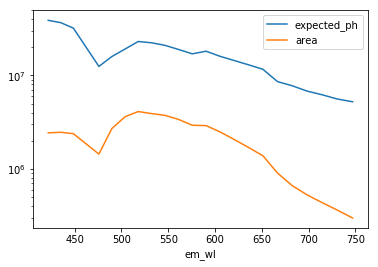

In [13]:
ax = df_peaks.groupby("em_wl").sum().reset_index().plot(x="em_wl", y="expected_ph")
df_peaks.groupby("em_wl").sum().reset_index().plot(x="em_wl", y="area", ax=ax)
plt.yscale('log')

In [15]:
df_peaks

ex_wl  pol1  pol2       area  width   em_wl   expected_ph
40   370.0   0.0   0.0  1281162.0     61  421.90  1.195822e+07
41   370.0   0.0  90.0   281197.0     61  421.90  3.416633e+06
42   370.0  90.0   0.0   454470.0     61  421.90  5.220692e+06
43   370.0  90.0  90.0   409845.0     61  421.90  1.827242e+07
44   380.0   0.0   0.0  1278973.0     65  435.25  1.120212e+07
45   380.0   0.0  90.0   288855.0     65  435.25  3.200606e+06
46   380.0  90.0   0.0   464609.0     65  435.25  4.958292e+06
47   380.0  90.0  90.0   427447.0     65  435.25  1.735402e+07
48   390.0   0.0   0.0  1220904.0     69  448.70  9.667672e+06
49   390.0   0.0  90.0   281428.0     69  448.70  2.762192e+06
50   390.0  90.0   0.0   451347.0     69  448.70  4.367342e+06
51   390.0  90.0  90.0   423655.0     69  448.70  1.528570e+07
52   410.0   0.0   0.0  1035234.0     77  476.00  7.815590e+06
53   410.0   0.0  90.0   270397.0     77  476.00  2.233026e+06
54   410.0  90.0   0.0    66554.0     77  476.00  5.406271e+05
55   410.0  90.0  90.0    64481.0     77  476.00  1.892195e+06
56   420.0   0.0   0.0  1983071.0     82  489.85  1.022746e+07
57   420.0   0.0  90.0   504250.0     82  489.85  2.922132e+06
58   420.0  90.0   0.0   105806.0     82  489.85  6.167914e+05
59   420.0  90.0  90.0   104270.0     82  489.85  2.158770e+06
60   430.0   0.0   0.0  2635608.0     87  503.85  1.201145e+07
61   430.0   0.0  90.0   648616.0     87  503.85  3.431842e+06
62   430.0  90.0   0.0   169583.0     87  503.85  8.203982e+05
63   430.0  90.0  90.0   150330.0     87  503.85  2.871394e+06
64   440.0   0.0   0.0  2849182.0     91  517.95  1.268686e+07
65   440.0   0.0  90.0   701458.0     91  517.95  3.624818e+06
66   440.0  90.0   0.0   273590.0     91  517.95  1.501434e+06
67   440.0  90.0  90.0   277331.0     91  517.95  5.255020e+06
68   450.0   0.0   0.0  2710857.0     97  532.20  1.222532e+07
69   450.0   0.0  90.0   656876.0     97  532.20  3.492948e+06
..     ...   ...   ...        ...    ...     ...           ...
98   520.0  90.0   0.0    89130.0    136  635.75  7.603726e+05
99   520.0  90.0  90.0    90898.0    136  635.75  2.661304e+06
100  530.0   0.0   0.0  1001721.0    143  651.20  6.286861e+06
101  530.0   0.0  90.0   203224.0    143  651.20  1.796246e+06
102  530.0  90.0   0.0    85402.0    143  651.20  7.863715e+05
103  530.0  90.0  90.0    86726.0    143  651.20  2.752300e+06
104  540.0   0.0   0.0   644371.0    151  666.70  4.385090e+06
105  540.0   0.0  90.0   126371.0    151  666.70  1.252883e+06
106  540.0  90.0   0.0    65443.0    151  666.70  6.542553e+05
107  540.0  90.0  90.0    65307.0    151  666.70  2.289893e+06
108  550.0   0.0   0.0   461145.0    157  682.40  3.731292e+06
109  550.0   0.0  90.0    89513.0    157  682.40  1.066083e+06
110  550.0  90.0   0.0    55592.0    157  682.40  6.554498e+05
111  550.0  90.0  90.0    54330.0    157  682.40  2.294074e+06
112  560.0   0.0   0.0   358069.0    165  698.30  3.075319e+06
113  560.0   0.0  90.0    70449.0    165  698.30  8.786627e+05
114  560.0  90.0   0.0    49537.0    165  698.30  6.306276e+05
115  560.0  90.0  90.0    47799.0    165  698.30  2.207197e+06
116  570.0   0.0   0.0   288435.0    172  714.35  2.655213e+06
117  570.0   0.0  90.0    55582.0    172  714.35  7.586322e+05
118  570.0  90.0   0.0    47351.0    172  714.35  6.201611e+05
119  570.0  90.0  90.0    42940.0    172  714.35  2.170564e+06
120  580.0   0.0   0.0   228470.0    180  730.55  2.258602e+06
121  580.0   0.0  90.0    43681.0    180  730.55  6.453148e+05
122  580.0  90.0   0.0    49964.0    180  730.55  5.965366e+05
123  580.0  90.0  90.0    39234.0    180  730.55  2.087878e+06
124  590.0   0.0   0.0   184555.0    188  746.95  1.992880e+06
125  590.0   0.0  90.0    37567.0    188  746.95  5.693944e+05
126  590.0  90.0   0.0    39034.0    188  746.95  5.906542e+05
127  590.0  90.0  90.0    35969.0    188  746.95  2.067290e+06

[88 rows x 7 columns]

In [14]:
tot = df_peaks.groupby("em_wl").sum().reset_index()

In [18]:
tot['collection_efficiency'] = tot["area"]/tot["expected_ph"]

In [19]:
tot.plot(x="em_wl", y="collection_efficiency")
# plt.yscale('log')

In [20]:
tot.idxmin()

em_wl                     0
ex_wl                     0
pol1                      0
pol2                      0
area                     21
width                     0
expected_ph              21
collection_efficiency    21
dtype: int64

In [21]:
# xys = [(ex_wl,peak) for (ex_wl,pol1,pol2), peak in peaks.items()  if (not pol1 and not pol2)]

NameError: name 'xys' is not defined

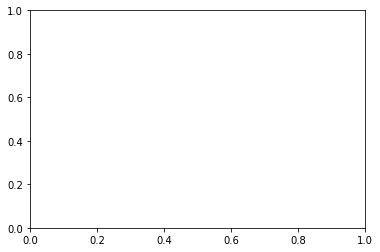

In [22]:
fig = plt.figure()
ax = fig.subplots(1,1)
xys = np.array(xys)
ax.step(xys[:,0], xys[:,1], linewidth=0.8, color='k')
plt.yscale('log')
plt.xlim((350,800))

In [ ]:
wls = xys[10:,0] #np.linspace(350, 800, 50)
photons = np.array([pwr_to_photons(wl, sample_pwr[0](wl))*diff_cs(wl)*solid_angle*water_density*exposure*depr for wl in wls])


In [ ]:
fig = plt.figure()
ax = fig.subplots(1,1)
ax.step(wls, photons, linewidth=0.8, color='k')
ax.step(xys[:,0], xys[:,1], linewidth=0.8, color='r')
plt.yscale('log')
plt.xlim((350,800))

In [ ]:
fig = plt.figure()
ax = fig.subplots(1,1)
em = [np.mean(raman_peak(wl)) for wl in wls]
ax.step(em, photons/xys[10:,1], linewidth=0.8, color='k')
# ax.step(xys[:,0], xys[:,1], linewidth=0.8, color='r')
plt.yscale('log')
plt.xlim((350,800))

In [ ]:
absolute = photons/xys[10:,1]
rel = absolute/absolute.max()
df_cal = pd.DataFrame({"ex_wl":wls, "em_wl":em, "efficiency":rel  })

In [ ]:
tot[["em_wl","collection_efficiency"]].to_csv("collection_efficiency.csv")